# MNIST(Modified National Institute of Standards and Technology dataset)

MNIST Dataset 是机器学习和计算机视觉领域中最著名、最常用的数据集之一，被誉为深度学习的“Hello World”。

| 特点 | 描述                                                  |
| :--- |:----------------------------------------------------|
| **内容** | **手写数字图像** (0 到 9，共 10 个类别)                         |
| **图像类型** | **灰度图像** (单通道)                                      |
| **图像大小** | **$28 \times 28$ 像素** (共 $28 \times 28 = 784$ 个像素点) |
| **数据总量** | **70,000 张图像（训练集：60000 测试集:10000）**                 |
| **应用领域** | 图像分类、模式识别，是评估新的机器学习算法的**标准基准**。                     |

**拓展数据集:**

随着机器学习的发展，人们也提出了更具挑战性的数据集作为 MNIST 的后续或替代品：

Fashion-MNIST: 图像内容从手写数字换成了 10 种时尚物品（如 T 恤、裤子、鞋子等），图像大小和结构保持一致 (28×28 灰度图)，难度略高于原始 MNIST。

EMNIST (Extended MNIST): 包含了手写数字、大写字母和小写字母，字符种类更广，应用场景更丰富。

| 特性 | TensorFlow (底层框架/引擎)                  | Keras (高级 API/接口)                                 |
| :--- |:--------------------------------------|:--------------------------------------------------|
| **主要定位** | **底层计算库**，负责张量运算、内存分配和并行计算。           | **高级 API**，负责快速、模块化地构建、训练和评估模型。                   |
| **角色** | 深度学习的**引擎**和**骨架**。                   | 深度学习的**用户界面**和**积木**。                             |
| **复杂度** | **复杂**。提供对计算细节的完全控制，适合研究和底层优化。        | **简洁直观**。旨在减少代码量和认知负担，提高开发效率。                     |
| **默认导入** | 需独立导入：`import tensorflow as tf`       | **集成**在 TensorFlow 中：`tf.keras`                   |
| **目标用户** | 资深研究人员、需要自定义操作的开发者。                   | **绝大多数用户**、初学者、需要快速原型设计的工程师。                      |
| **关系总结** | Keras 在运行时**使用 TensorFlow** 作为后端计算引擎。 | **`tf.keras`** 是 TensorFlow **官方推荐**和集成的标准高级 API。 |

In [ ]:
## 加载方式1（数据会下载到 ~/.keras/datasets,也可以本地下载好，存在该目录）

import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
#加载方式2
#本地加载 wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
# npz 文件格式是 NumPy 库专用的压缩文件格式,类似于 .zip 文件
import numpy as np
import tensorflow as tf
#当 NumPy 将包含 Python 对象的数组保存到 .npy 或 .npz 文件中时，它必须使用 Pickle 协议 来序列化这些 Python 对象
with np.load("/Users/yfan/Downloads/mnist.npz", allow_pickle=True) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# 代码来源:https://www.tensorflow.org/?hl=zh-cn

# 数据归一化（Normalization）。MNIST 图像的像素值范围是 0 到 255（灰度值）。将像素值除以 255.0，将其范围缩放到 0.0 到 1.0 之间。这是深度学习模型训练的标准预处理步骤，有助于加速模型收敛并提高训练稳定性。
x_train, x_test = x_train / 255.0, x_test / 255.0
# 代码来源:https://www.tensorflow.org/?hl=zh-cn
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#将输入图像从二维数组 (28×28) 转换为一个一维向量 (784)，作为全连接层的输入。input_shape 指定了输入数据的形状。
  tf.keras.layers.Dense(128, activation='relu'),#具有 128 个神经元的隐藏层。使用 ReLU (Rectified Linear Unit) 激活函数，引入非线性。
  tf.keras.layers.Dropout(0.2),#在训练过程中随机地将 20% (0.2) 的神经元输出设置为零。这是一种正则化技术，用于防止模型在训练集上过度拟合 (overfitting)。
  tf.keras.layers.Dense(10, activation='softmax')#具有 10 个神经元（对应 0 到 9 的 10 个类别）。使用 Softmax 激活函数，将输出转换为概率分布，所有 10 个输出值的和为 1。
])

model.compile(optimizer='adam',#指定优化器。Adam 优化器是一种高效、常用的优化算法，用于调整模型的权重以最小化损失。
  loss='sparse_categorical_crossentropy',#指定损失函数。这是用于多类别分类的交叉熵损失函数。
  metrics=['accuracy'])#指定评估指标。在训练和测试期间，模型除了计算损失外，还会计算并报告准确率。

model.fit(x_train, y_train, epochs=5)#epochs=5: 指定训练轮次。模型将对整个训练集迭代学习 5 次。每完成一轮 (epoch)，都会报告当前的损失和准确率。
model.evaluate(x_test, y_test)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9141 - loss: 0.2969
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9578 - loss: 0.1424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.9677 - loss: 0.1088
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9727 - loss: 0.0890
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.9761 - loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.9758 - loss: 0.0801


[0.08011163771152496, 0.9757999777793884]

| 主要类别 | 典型网络类型 | 结构特点 | 典型应用领域 |
| :--- | :--- | :--- | :--- |
| **基础前馈/结构网络** | **多层感知机 (MLP)** | 最基础，信息**单向**流动，适合简单分类和回归。 | 简单分类、回归、预测。 |
| | **卷积神经网络 (CNN)** | 引入**卷积层**提取局部特征，对**网格数据**高效。 | 图像识别、目标检测、视频分析。 |
| | **残差网络 (ResNet)** | CNN 进阶版，通过**残差块**允许信息跳跃，解决深层网络的训练退化问题。 | 深度图像识别、高性能计算机视觉任务。 |
| **序列处理网络** | **长短期记忆网络 (LSTM)** | 引入**门控机制**，有效捕捉**序列数据**中的**长期依赖**。 | 语音识别、机器翻译、文本生成、复杂的时序分析。 |
| | **Transformer** | 完全基于**自注意力机制**，支持高度并行化，是现代序列模型的基石。 | **大型语言模型 (LLM)**、高性能机器翻译。 |
| **进阶/专用架构** | **自编码器 (AE)** | 包含编码器和解码器，目标是重构输入。用于**无监督学习**。 | 数据**降维**、特征学习、去噪、异常检测。 |
| | **生成对抗网络 (GAN)** | 由**生成器**和**判别器**相互对抗训练，目标是生成逼真的新数据。 | **图像生成**、图像风格迁移、数据增强。 |

**demo project:（基于scikitlearn）**

[Yeboah F. Classification and Evaluation of Machine Learning Algorithms on the MNIST Dataset[J]. 2025.](https://stars.library.ucf.edu/data-science-mining/27/)

💾 正在加载数据...
原始训练集形状: (60000, 28, 28)
原始测试集形状: (10000, 28, 28)
展平后训练集特征形状: (60000, 784)
----------------------------------------
📊 正在生成 训练集 (Training Set) 类别分布图...


/var/folders/g0/cdpky0t54rd1cc3cnh73g6840000gn/T/ipykernel_8227/3321628411.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis", edgecolor='black')


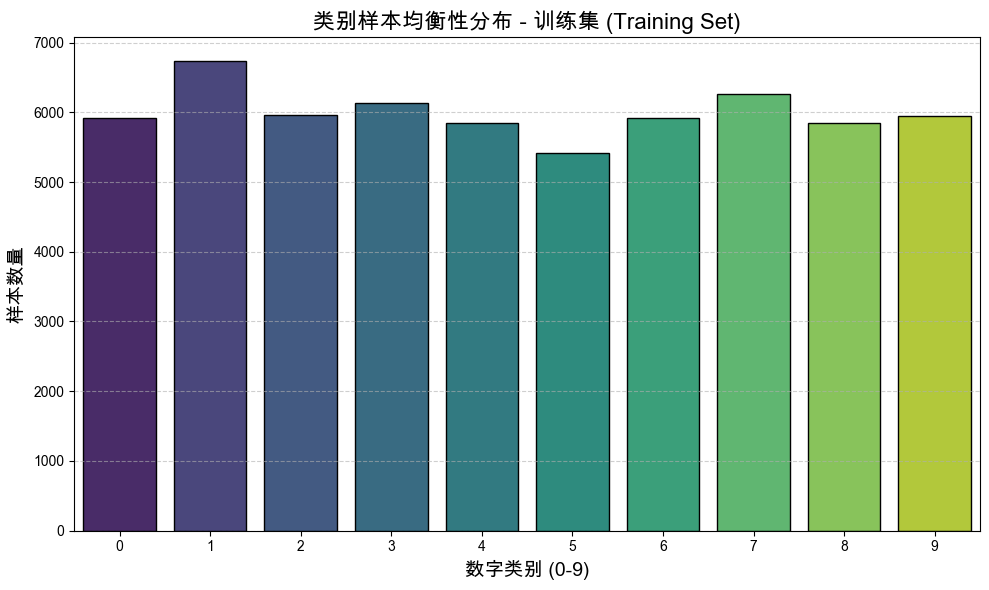

🚀 正在训练 K-Nearest Neighbor (KNN) 模型...
KNN 模型耗时: 2.37 秒 (训练和预测)
----------------------------------------
🚀 正在训练 Naive Bayes (朴素贝叶斯) 模型...
Naive Bayes 模型耗时: 0.08 秒 (训练和预测)
----------------------------------------
=== K-Nearest Neighbor (KNN) 模型性能评估 ===
准确率 (Accuracy):   0.9688
错误率 (Error Rate):  0.0312
精确率 (Precision):   0.9690
F1-Score:            0.9687

--- 详细分类报告 ---
              precision    recall  f1-score   support

           0     0.9634    0.9939    0.9784       980
           1     0.9545    0.9982    0.9759      1135
           2     0.9822    0.9603    0.9711      1032
           3     0.9644    0.9663    0.9654      1010
           4     0.9762    0.9613    0.9687       982
           5     0.9653    0.9664    0.9658       892
           6     0.9813    0.9864    0.9839       958
           7     0.9611    0.9611    0.9611      1028
           8     0.9881    0.9374    0.9621       974
           9     0.9563    0.9534    0.9548      1009

    accuracy                    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

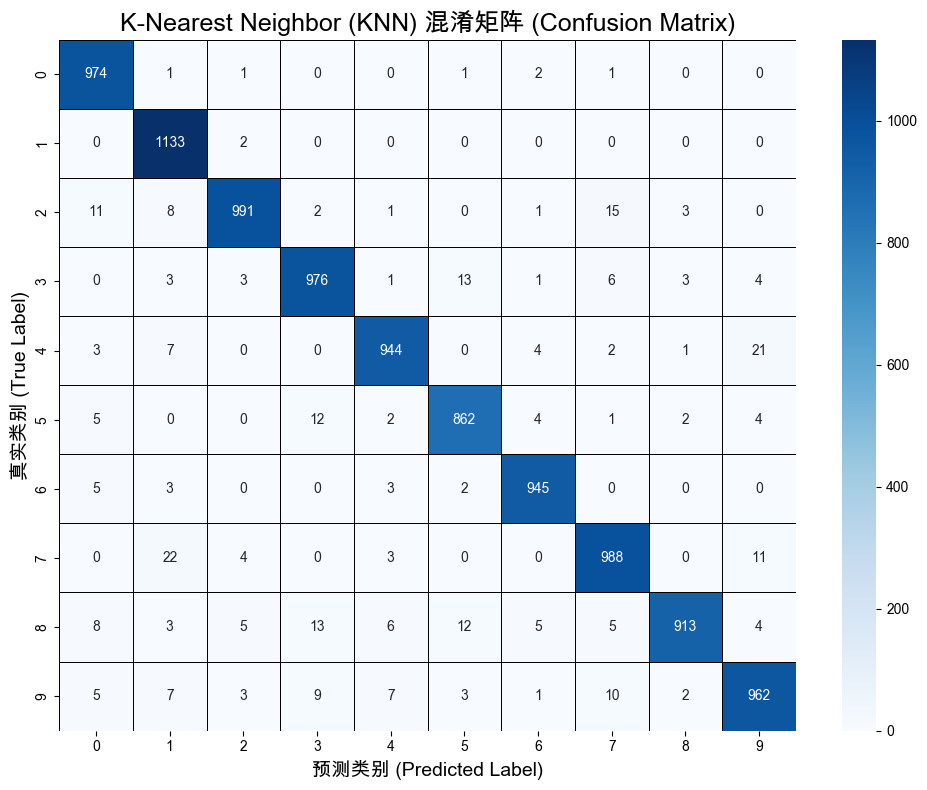

=== Multinomial Naive Bayes 模型性能评估 ===
准确率 (Accuracy):   0.8365
错误率 (Error Rate):  0.1635
精确率 (Precision):   0.8445
F1-Score:            0.8373

--- 详细分类报告 ---
              precision    recall  f1-score   support

           0     0.9249    0.9306    0.9278       980
           1     0.9123    0.9348    0.9234      1135
           2     0.8984    0.8314    0.8636      1032
           3     0.7976    0.8426    0.8195      1010
           4     0.8433    0.7454    0.7914       982
           5     0.8601    0.6614    0.7478       892
           6     0.8857    0.8977    0.8917       958
           7     0.9359    0.8375    0.8840      1028
           8     0.6635    0.7977    0.7245       974
           9     0.7115    0.8553    0.7768      1009

    accuracy                         0.8365     10000
   macro avg     0.8433    0.8335    0.8350     10000
weighted avg     0.8445    0.8365    0.8373     10000

📊 正在生成 Multinomial Naive Bayes 混淆矩阵图...


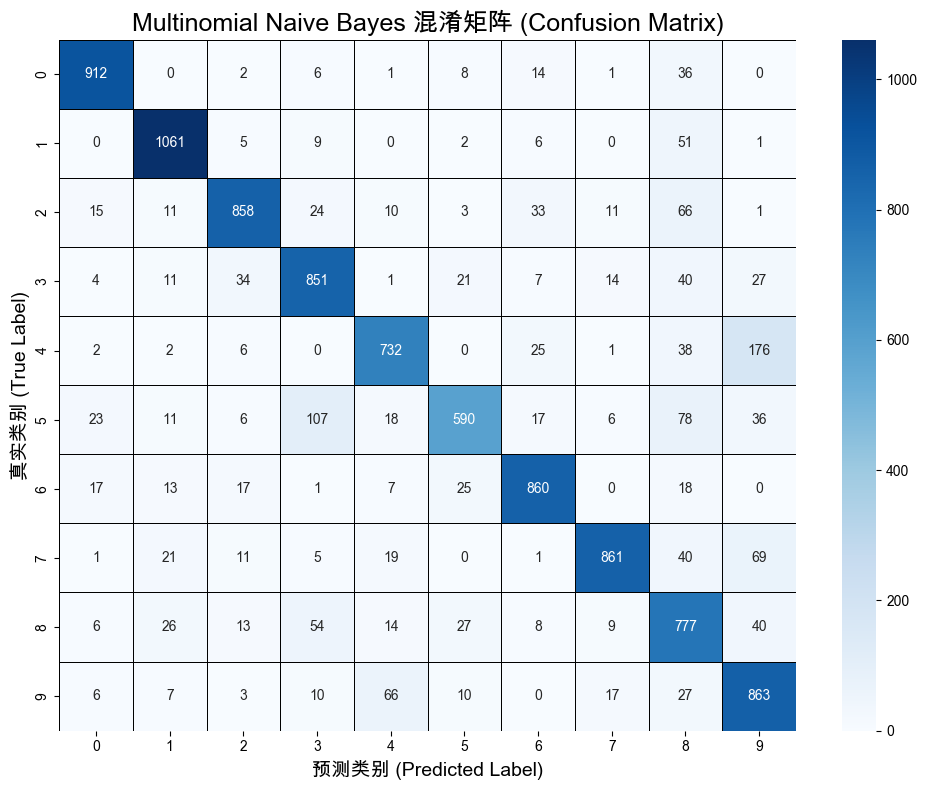

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import time

# --- 引入绘图库 ---
import matplotlib.pyplot as plt
import seaborn as sns
# --- 设置中文显示 ---
# 设置字体，以支持中文显示。SimHei 是常见黑体，Arial Unicode MS 是跨平台兼容字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
# 解决保存图像时负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 数据加载与预处理 ---
print("💾 正在加载数据...")
try:
    # 假设用户提供了包含 MNIST 数据的 mnist.npz 文件路径
    with np.load("/Users/yfan/Downloads/mnist.npz", allow_pickle=True) as data:
        x_train = data['x_train']
        y_train = data['y_train']
        x_test = data['x_test']
        y_test = data['y_test']
except FileNotFoundError:
    # 如果文件不存在，使用 tensorflow.keras 默认加载（更可靠）
    print("⚠️ 无法在 './test_data/mnist.npz' 找到数据。正在使用 Keras 加载 MNIST 数据。")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
except Exception as e:
    print(f"加载数据时发生错误: {e}")
    exit()

print(f"原始训练集形状: {x_train.shape}")
print(f"原始测试集形状: {x_test.shape}")

# 数据归一化 (Normalization)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 展平数据：将 (N, 28, 28) 形状转换为 (N, 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f"展平后训练集特征形状: {x_train.shape}")
print("-" * 40)


# --- 绘图函数定义 ---

def plot_class_distribution(y_data, title):
    """绘制类别样本数量的均衡性条形图"""
    print(f"📊 正在生成 {title} 类别分布图...")
    # 统计每个类别的数量
    unique, counts = np.unique(y_data, return_counts=True)

    plt.figure(figsize=(10, 6))
    # 使用 seaborn 绘制条形图
    sns.barplot(x=unique, y=counts, palette="viridis", edgecolor='black')
    plt.title(f'类别样本均衡性分布 - {title}', fontsize=16)
    plt.xlabel('数字类别 (0-9)', fontsize=14)
    plt.ylabel('样本数量', fontsize=14)
    plt.xticks(unique)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    """绘制混淆矩阵热力图"""
    print(f"📊 正在生成 {model_name} 混淆矩阵图...")
    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    # 使用 seaborn 绘制混淆矩阵热力图
    sns.heatmap(
        cm,
        annot=True,     # 在每个单元格中显示数值
        fmt='d',        # 格式化为整数
        cmap='Blues',   # 颜色主题
        cbar=True,      # 显示颜色条
        linewidths=.5,  # 单元格边框
        linecolor='black',
        xticklabels=np.unique(y_true), # x轴标签 (预测类别)
        yticklabels=np.unique(y_true)  # y轴标签 (真实类别)
    )
    plt.title(f'{model_name} 混淆矩阵 (Confusion Matrix)', fontsize=18)
    plt.ylabel('真实类别 (True Label)', fontsize=14)
    plt.xlabel('预测类别 (Predicted Label)', fontsize=14)
    plt.tight_layout()
    plt.show()

# --- 1.5 类别分布可视化 ---
plot_class_distribution(y_train, "训练集 (Training Set)")


# --- 2. K-Nearest Neighbor (KNN) 分类器 ---
print("🚀 正在训练 K-Nearest Neighbor (KNN) 模型...")
start_time_knn = time.time()

# 初始化 KNN 模型，选择 K=5
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 训练模型（KNN 是惰性学习，此步骤很快）
knn.fit(x_train, y_train)

# 进行预测
y_pred_knn = knn.predict(x_test)
end_time_knn = time.time()
print(f"KNN 模型耗时: {end_time_knn - start_time_knn:.2f} 秒 (训练和预测)")
print("-" * 40)


# --- 3. Naive Bayes (朴素贝叶斯) 分类器 ---
# 使用 MultinomialNB (多项式朴素贝叶斯)
print("🚀 正在训练 Naive Bayes (朴素贝叶斯) 模型...")
start_time_nb = time.time()

nb_classifier = MultinomialNB()

# MNB 要求非负整数或浮点数，将归一化数据乘以 255.0 以模拟计数特征
nb_classifier.fit(x_train * 255.0, y_train)

# 进行预测
y_pred_nb = nb_classifier.predict(x_test * 255.0)
end_time_nb = time.time() # 修正了变量名错误
print(f"Naive Bayes 模型耗时: {end_time_nb - start_time_nb:.2f} 秒 (训练和预测)")
print("-" * 40)


# --- 4. 文本评估函数 ---

def evaluate_model(y_true, y_pred, model_name):
    """计算并打印各种性能指标"""
    print(f"=== {model_name} 模型性能评估 ===")

    # 1. 准确率 (Accuracy)
    accuracy = accuracy_score(y_true, y_pred)

    # 2. 错误率 (Error Rate)
    error_rate = 1 - accuracy

    # 3. 精确率 (Precision) 和 F1-Score
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # 4. 完整的分类报告
    report = classification_report(y_true, y_pred, digits=4, zero_division=0)

    print(f"准确率 (Accuracy):   {accuracy:.4f}")
    print(f"错误率 (Error Rate):  {error_rate:.4f}")
    print(f"精确率 (Precision):   {precision:.4f}")
    print(f"F1-Score:            {f1:.4f}")

    print("\n--- 详细分类报告 ---")
    print(report)
    print("=" * 40)

# --- 5. 结果评估与混淆矩阵可视化 ---

# 评估 KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbor (KNN)")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbor (KNN)")

# 评估 Naive Bayes
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")
plot_confusion_matrix(y_test, y_pred_nb, "Multinomial Naive Bayes")
